<div class="alert alert-block alert-success">
    <b>Universidad Rey Juan Carlos de Madrid. <br>ERASMUS+ in UCBM</b>  <br>Biomedical Engineering
</div>

<div class="alert alert-block alert-info"> Pablo Laso Mielgo </div> 

## ESERCITAZIONE 1 - PARTE 1

Lo scopo di questo script è quello di simulare la costruzione di un dataset.
Supponiamo di osservare tre fenomeni distinti, i quali si manifestano casualmente uno dopo l'altro e decidiamo di scrivere in una tabella, ogni volta, i valori di tre differenti parametri che misuriamo da ogni fenomeno ad ogni loro manifestazione.
In questo modo andremo a costruire un dataset con tante righe quante sono le manifestazioni dei fenomeni (osservazioni, in generale N), tante colonne quanti sono i parametri analizzati (feature, in questo caso 3) e tanti differenti valori di etichette quanti sono i fenomeni distinti osservati (classi, in questo caso sempre 3).

Visit [Splitter Classes](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection)

---

Procedere quindi codificando i seguenti passi:

1) Supponiamo che i fenomeni siano tutti di tipo aleatorio e che i parametri che andiamo a misurare abbiano quindi tutti una distribuzione ad esempio Normale; definire allora ogni fenomeno attraverso una sua media (in 3 dimensioni, una per feature, quindi un vettore 1x3) ed una sua varianza (una matrice di covarianza 3x3, simmetrica)

In [1]:
# Fenomeno 1
mu_1 = [3, 15, 9]
sigma_1 = [[1, .5, 0],
           [.5, 1, 0],
           [0, 0, 1]]

# Fenomeno 2
mu_2 = [12, 9, 3]
sigma_2 = [[1, 0, 0],
           [0, 2, 0],
           [0, 0, 1]]

# Fenomeno 3
mu_3 = [6, 3, 15]
sigma_3 = [[3, 0, 0],
           [0, 1, 0],
           [0, 0, 1]]

In [2]:
mu_1[0]

3

 media di ogni fenomeno sarà il centro di aggregazione delle osservazioni del fenomeno stesso, mentre la matrice di covarianza determinerà la dispersione delle sue osservazioni.
 <p> 2) Dobbiamo ora simulare l'osservazione dei fenomeni e la raccolta dei relativi dati misurati.
Creare una matrice di dataset vuota;
Creare un ciclo di N osservazioni a scelta (es. 100);
Per ogni iterazione scegliere casualmente uno dei tre fenomeni (attraverso una varabile che potrà valere casualmente 1 o 2 o 3);
Generare 3 valori casuali (uno per parametro misurato) con distribuzione Normale provenienti dal tipo fenomeno casualmente scelto (consiglio: usare la funzione "mvnrnd()");
Aggiungere in coda al dataset i valori generati assieme al tipo di fenomeno che li ha generati.

In [3]:
import numpy as np
import random
Nobs= 100
dataset= {}
category_list= []
obs_list= []
obs_list_1= []
obs_list_2= []
obs_list_3= []

for n in range(Nobs):
    category=random.randrange(1, 4,1)
    category_list.append(category)
    dataset['category']=category_list
    if category==1:
        obs_list.append(np.random.multivariate_normal(mu_1, sigma_1))
        obs_list_1.append(np.random.multivariate_normal(mu_1, sigma_1))
    elif category==2:
        obs_list.append(np.random.multivariate_normal(mu_2, sigma_2))
        obs_list_2.append(np.random.multivariate_normal(mu_2, sigma_2))
    elif category==3:
        obs_list.append(np.random.multivariate_normal(mu_3, sigma_3))
        obs_list_3.append(np.random.multivariate_normal(mu_3, sigma_3))
    else:
        obs_list.append('error')
    dataset['observations']=obs_list    

Ora dovremmo avere un dataset numerico di dimensioni Nx(M + 1).

3) Plottare il dataset mostrando ogni osservazione come un punto distinto ed evidenziandolo con un colore specifico della classe classe di appartenenza: in questo modo andremo a vedere come si distribuiscono i valori registrati nello spazio delle feature (essendo 3 le feature del dataset, avremo uno spazio 3D).

Dal plot si vedono i tre fenomeni distinti, centrati nelle loro medie e con una ellitticità determinata dalle relative matrici di covarianza. Avere un dataset come questo è generalmente l'inizio di una pipeline di Machine Learning classico.

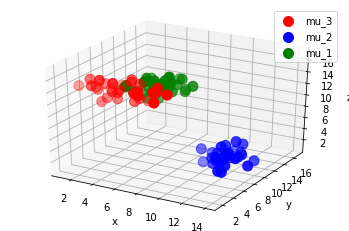

In [4]:
# plotting a 3D scatter plot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(np.array(obs_list_3)[:,0], np.array(obs_list_3)[:,1], np.array(obs_list_3)[:,2],color='red', label='mu_3', marker = ('o'), s=100)
ax.scatter(np.array(obs_list_2)[:,0], np.array(obs_list_2)[:,1], np.array(obs_list_2)[:,2],color='blue', label='mu_2', marker = ('o'), s=100)
ax.scatter(np.array(obs_list_1)[:,0], np.array(obs_list_1)[:,1], np.array(obs_list_1)[:,2],color='green', label='mu_1', marker = ('o'), s=100)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.show()

Dal plot si vedono i tre fenomeni distinti, centrati nelle loro medie e con una ellitticità determinata dalle relative matrici di covarianza. Avere un dataset come questo è generalmente l'inizio di una pipeline di Machine Learning classico.

---
<br>

---

## ESERCITAZIONE 1 - PARTE 2


In questa esercitazione andiamo a vedere come impostare una semplice generica pipeline di Machine Learning.
Partiamo da un dataset artificiale ed finiamo con la misura delle performance, senza entrare in merito al tipo di classificatore che utilizziamo (utilizziamo infatto un classificatore fittizio, che prende decisioni quasi banali).

Procediemo nel seguente modo:

**1)** Generiamo un dataset di N misure di 3 fenomeni aleatori, di cui osserviamo 3 parametri distinti, ottenendo quindi una matrice Nx(M + 1) **[vedere Parte 1]**.

**2)** Per inizializzare il codice, dal dataset:
estrarre la sotto-matrice delle feature;
estrarre il sotto-vettore delle label;
calcolare il numero di osservazioni totali;
calcolare numero di classi distinte che abbiamo.

In [5]:
np.array(dataset['observations'])[:,0]

array([ 3.51219007,  8.03807657,  9.84494837, 13.76446851, 11.99759296,
        3.64593896,  2.05140481,  6.42395055, 11.3484187 ,  5.59536889,
       12.76255398,  4.28148926, 13.21795939,  3.68163792, 13.28266692,
       11.53960674, 10.46694929,  2.57915135,  1.25319922,  3.41077576,
       12.11545292, 10.5271881 ,  2.72328044, 12.39463291,  4.73458452,
        6.7326828 ,  2.73884336,  8.67021618, 12.03877193,  4.06739923,
        1.14056973,  4.1584935 ,  5.25742508,  2.14684363,  1.1410327 ,
        7.4718669 ,  7.14429241,  2.26573783,  1.66762864, 11.25029569,
       10.80667176,  3.48639093,  4.58466331,  7.7290734 , 12.91322748,
       11.37422363,  3.25044344,  7.65745392, 12.17271102, 11.58762516,
       10.99833767,  5.39414294,  4.95232816,  4.57372284,  6.47037304,
       11.19926659,  3.42587783,  5.01816306, 12.65642433,  2.11198991,
        1.69940519, 12.5458445 ,  5.01097932,  5.82583292,  3.55072356,
       12.06710882,  2.98248315,  6.06599213,  1.91576571,  2.59

In [6]:
labels= dataset['category']
features= np.array(dataset['observations'])[:]
print('---labels---\n',labels,'\n---features---\n',features,'\n---number of obervations---\n',Nobs,'\n---number of labels---\n',np.unique(labels))

---labels---
 [1, 3, 3, 2, 2, 1, 1, 3, 2, 3, 2, 3, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 3, 3, 1, 3, 2, 1, 1, 1, 3, 1, 1, 3, 3, 1, 1, 2, 2, 1, 3, 3, 2, 2, 1, 3, 2, 2, 2, 3, 3, 3, 3, 2, 1, 3, 2, 1, 1, 2, 3, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1, 2, 3, 3, 1, 1, 1, 3, 1, 1, 3, 3, 2, 2, 1, 1, 3, 2, 3, 2, 3, 2, 1, 1, 3, 2, 2, 1] 
---features---
 [[ 3.51219007 14.83707923  9.29792102]
 [ 8.03807657  2.76401054 14.83652506]
 [ 9.84494837  1.87901745 14.28157814]
 [13.76446851 11.33442948  2.63387222]
 [11.99759296  8.89184103  3.04105863]
 [ 3.64593896 15.96360709  9.58154649]
 [ 2.05140481 14.05031692  7.22145355]
 [ 6.42395055  2.65671824 15.21652374]
 [11.3484187   7.50298847  3.89097623]
 [ 5.59536889  2.53629393 16.26682676]
 [12.76255398 12.5559455   3.2121442 ]
 [ 4.28148926  2.25533652 14.84608244]
 [13.21795939  8.65809264  3.21913214]
 [ 3.68163792 16.3572568   8.64702567]
 [13.28266692  7.59308965  1.67424634]
 [11.53960674  9.12153972  3.03773603]
 [10.46694929  7.79763992  1.34561714]
 [ 2.

**3)** Ora dobbiamo sviluppare il contenuto principale della pipeline ed utilizzare quindi il dataset che abbiamo per stimare le prestazioni di un classificatore scelto.
Avendo un numero di osservaioni limitato, conviene sempre dividere il dataset in:
Training set: porzione di osservazioni sulle quali addestrare il classificatore;
Test set: porzione di osservazioni (generalmente in numero inferiore rispetto a quella del training set) sulle quali testare la bravura del classificatore addestrato, chiedendogli di predire le etichette delle relative osservazioni (le etichette dei campioni di test, nascoste al classificatore, verranno utilizzate dopo per misrare il risultato).
N.B.: Per il training e la classificazione utilizzare le funzioni "addestra_classificatore()" e "classifica_osservazioni()". Maggiori dettagli su queste funzioni saranno disponibili nelle prossime lezioni, quando affronteremo i differenti classificatori.

Procedere provando ad implementare i seguenti metodi di validazione con classificazione e costruzione della Confusion Matrix:

* **Hold Out Validation**:

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.2) # auto-randomizes

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=1)

In [9]:
X_train=np.reshape(X_train, (-1, 3))
y_train=np.array(y_train)
X_train

array([[13.51657979,  9.72397651,  3.7744804 ],
       [ 4.06739923, 17.20021262,  9.51938512],
       [ 3.24800961, 14.85036349,  8.52217862],
       [11.53960674,  9.12153972,  3.03773603],
       [ 3.48639093, 14.48169041,  9.20895463],
       [ 3.82036071,  3.40713232, 15.49791574],
       [10.2525277 ,  9.43943029,  2.56577804],
       [12.76255398, 12.5559455 ,  3.2121442 ],
       [ 3.68163792, 16.3572568 ,  8.64702567],
       [ 7.4718669 ,  0.46560927, 13.93435526],
       [11.37422363,  9.50746554,  2.8166098 ],
       [ 8.67021618,  3.38719664, 15.87960275],
       [ 2.73884336, 15.65174685,  8.52889242],
       [ 7.98373088,  1.57135234, 14.59821987],
       [ 4.1584935 , 14.47272799,  8.02136832],
       [ 2.72328044, 14.98919856,  8.63779639],
       [13.28266692,  7.59308965,  1.67424634],
       [12.45224705,  8.50487171,  3.49315896],
       [ 3.68960075, 15.05681221,  8.46622669],
       [ 4.32127074, 15.03187548,  8.36159476],
       [10.80667176,  9.17432892,  2.974

In [10]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [11]:
X_test=np.reshape(X_train, (-1, 3))
y_test=np.array(y_train)

In [12]:
y_pred= knn.predict(X_test)
print('\nTest set predictions:\n {}'.format(y_pred))


Test set predictions:
 [2 1 1 2 1 3 2 2 1 3 2 3 1 3 1 1 2 2 1 1 2 2 2 3 3 2 2 1 2 2 1 1 3 1 1 3 3
 2 3 1 2 3 1 3 3 2 3 1 1 1 1 1 3 3 2 1 3 1 1 2 3 3 2 3 3 3 3 2 1 1 1 1 3 3
 3 1 3 2 3 3]


In [13]:
print('Test set score: {:.3f}'.format(np.mean(y_pred == y_test)))

Test set score: 1.000


In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[29,  0,  0],
       [ 0, 22,  0],
       [ 0,  0, 29]], dtype=int64)

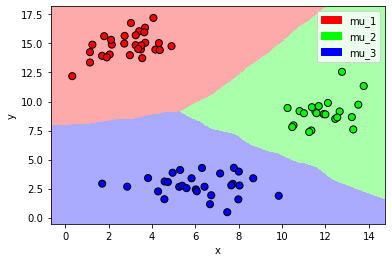

In [18]:
#import numpy
#import pandas as pd
#import seaborn as sn
#import matplotlib.pyplot as plt
#import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
from sklearn import neighbors
import matplotlib.patches as mpatches
#import graphviz
#from sklearn.tree import export_graphviz
#import matplotlib.patches as mpatches

n_neighbors=5
weights='uniform'

X=X=X_train[:,:2]
y=y_train
X_mat=X
y_mat=y
#X_mat = X[[1,2]].as_matrix()
#y_mat = y.as_matrix()

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
clf.fit(X_mat, y_mat)

# Plot the decision boundary by assigning a color in the color map
# to each mesh point.

mesh_step_size = .01  # step size in the mesh
plot_symbol_size = 50

x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                     np.arange(y_min, y_max, mesh_step_size))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot training points
plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

patch0 = mpatches.Patch(color='#FF0000', label='mu_1')
patch1 = mpatches.Patch(color='#00FF00', label='mu_2')
patch2 = mpatches.Patch(color='#0000FF', label='mu_3')
#patch3 = mpatches.Patch(color='#AFAFAF', label='lemon')
plt.legend(handles=[patch0, patch1, patch2])


plt.xlabel('x')
plt.ylabel('y')

plt.show()

* **K-fold Cross Validation**

In [ ]:
from sklearn.model_selection import KFold # import KFold
X = features
y = labels
kf = KFold(n_splits=10, shuffle=False) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
print(kf) 
KFold(n_splits=10, random_state=185, shuffle=False)

In [ ]:
y=np.array(y)

In [362]:
k=1
for train_index, test_index in kf.split(X):
    print('\n----------- k =',k,'-----------')
    print('TRAIN:', train_index, '\nTEST:', test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    y_pred= knn.predict(X_test)
    print('\nTest set predictions: {}'.format(y_pred))
    print('Test set score: {:.3f}'.format(np.mean(y_pred == y_test)))
    k+=1


----------- k = 1 -----------
TRAIN: [10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34
 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84
 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99] 
TEST: [0 1 2 3 4 5 6 7 8 9]

Test set predictions: [3 2 1 2 2 2 2 2 1 3]
Test set score: 1.000

----------- k = 2 -----------
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34
 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84
 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99] 
TEST: [10 11 12 13 14 15 16 17 18 19]

Test set predictions: [1 2 1 3 3 2 1 1 3 2]
Test set score: 1.000

----------- k = 3 -----------
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 30 31 32 33 34
 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 

In [363]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[6, 0, 0],
       [0, 2, 0],
       [0, 0, 2]], dtype=int64)

* **Stratified K-fold Cross Validation (difficile)**:

In [412]:
from sklearn.model_selection import StratifiedKFold
X = features
y = np.array(labels)
skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(X, y)
print(skf)
StratifiedKFold(n_splits=10, random_state=None, shuffle=False)
k=1
for train_index, test_index in skf.split(X, y):
    print('\n---------- K =',k,'----------')
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    y_pred= knn.predict(X_test)
    print('\nTest set predictions: {}'.format(y_pred))
    print('Test set score: {:.3f}'.format(np.mean(y_pred == y_test)))
    k+=1
    print(confusion_matrix(y_test, y_pred))

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)

---------- K = 1 ----------
TRAIN: [ 5  6  7 11 14 15 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35
 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60
 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85
 86 87 88 89 90 91 92 93 94 95 96 97 98 99] TEST: [ 0  1  2  3  4  8  9 10 12 13 16]

Test set predictions: [3 2 1 2 2 1 3 1 1 3 1]
Test set score: 1.000
[[5 0 0]
 [0 3 0]
 [0 0 3]]

---------- K = 2 ----------
TRAIN: [ 0  1  2  3  4  8  9 10 11 12 13 15 16 19 22 26 27 28 29 30 31 32 33 34 35
 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60
 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85
 86 87 88 89 90 91 92 93 94 95 96 97 98 99] TEST: [ 5  6  7 14 17 18 20 21 23 24 25]

Test set predictions: [2 2 2 3 1 3 1 3 1 1 1]
Test set score: 1.000
[[5 0 0]
 [0 3 0]
 [0 0 3]]

---------- K = 3 ----------
TRAIN: [ 0  1  2

* **Leave-One-Out Cross Validation**:

In [414]:
from sklearn.model_selection import LeaveOneOut 
X = features
y = np.array(labels)
loo = LeaveOneOut()
loo.get_n_splits(X)

k=1
for train_index, test_index in loo.split(X):
    print('\n---------- K =',k,'----------')
    print("TRAIN:", train_index, "\nTEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print(X_train, X_test, y_train, y_test)
    knn.fit(X_train, y_train)
    y_pred= knn.predict(X_test)
    print('\nTest set predictions: {}'.format(y_pred))
    print('Test set score: {:.3f}'.format(np.mean(y_pred == y_test)))
    print(confusion_matrix(y_test, y_pred))
    k+=1


---------- K = 1 ----------
TRAIN: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99] 
TEST: [0]
[[ 12.31761083   8.92691706   3.08200547]
 [  1.17460624  14.99432254   9.76569318]
 [ 10.27031111   8.28016739   3.45516526]
 [ 12.61092364   8.76432254   3.0665985 ]
 [ 10.62226573   7.75171494   4.44727778]
 [ 13.11666788   7.14604486   2.79857726]
 [ 10.64997979   7.63363735   3.42992804]
 [  3.15023359  13.86328697  10.73879921]
 [  8.6682412    1.79876728  16.2670459 ]
 [  2.56719046  14.54646415   8.28111386]
 [ 11.25324519   9.01233359   2.92521748]
 [  3.25521859  14.35447109   8.1912627 ]
 [  6.01216432   3.54978733  15.29340335]
 [  4.53972978   3.9471362   16.28823575]
 [ 11.10519966  11.70766395   4.68868439]
 [  3.33622127  14.41

 2 1 1 2 1 3 3 3 3 1 3 3 3 1 3 3 3 1 1 2 1 1 1 1 2] [2]

Test set predictions: [2]
Test set score: 1.000
[[1]]

---------- K = 5 ----------
TRAIN: [ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99] 
TEST: [4]
[[  7.24305126   2.74938462  14.87185409]
 [ 12.31761083   8.92691706   3.08200547]
 [  1.17460624  14.99432254   9.76569318]
 [ 10.27031111   8.28016739   3.45516526]
 [ 10.62226573   7.75171494   4.44727778]
 [ 13.11666788   7.14604486   2.79857726]
 [ 10.64997979   7.63363735   3.42992804]
 [  3.15023359  13.86328697  10.73879921]
 [  8.6682412    1.79876728  16.2670459 ]
 [  2.56719046  14.54646415   8.28111386]
 [ 11.25324519   9.01233359   2.92521748]
 [  3.25521859  14.35447109   8.1912627 ]
 [  6.01216432   3.54978733  15.2934


---------- K = 44 ----------
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 44 45 46 47 48 49 50
 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99] 
TEST: [43]
[[  7.24305126   2.74938462  14.87185409]
 [ 12.31761083   8.92691706   3.08200547]
 [  1.17460624  14.99432254   9.76569318]
 [ 10.27031111   8.28016739   3.45516526]
 [ 12.61092364   8.76432254   3.0665985 ]
 [ 10.62226573   7.75171494   4.44727778]
 [ 13.11666788   7.14604486   2.79857726]
 [ 10.64997979   7.63363735   3.42992804]
 [  3.15023359  13.86328697  10.73879921]
 [  8.6682412    1.79876728  16.2670459 ]
 [  2.56719046  14.54646415   8.28111386]
 [ 11.25324519   9.01233359   2.92521748]
 [  3.25521859  14.35447109   8.1912627 ]
 [  6.01216432   3.54978733  15.29340335]
 [  4.53972978   3.9471362   16.28823575]
 [ 11.10519966  11.

* **Bootstrap K-fold Cross Validation**:

In [712]:
train_index=np.random.choice(100,80, replace=True, p=None)
test_index = [x for x in range(100) if x not in train_index]

In [713]:
Xtrain_list= []
ytrain_list= []
k=1
for num in train_index:
    Xtrain_list.append(features[num])
    ytrain_list.append(labels[num])
Xtrain_list=np.array(Xtrain_list)
ytrain_list=np.array(ytrain_list)

Xtest_list= []
ytest_list= []
for num in test_index:
    Xtest_list.append(features[num])
    ytest_list.append(labels[num])
Xtest_list=np.array(Xtest_list)
ytest_list=np.array(ytest_list)

In [714]:
knn.fit(Xtrain_list, ytrain_list)
y_pred= knn.predict(Xtest_list)
print('\nTest set predictions: {}'.format(y_pred))
print('Test set score: {:.3f}'.format(np.mean(y_pred == ytest_list)))
print(confusion_matrix(ytest_list, y_pred))


Test set predictions: [3 2 2 1 2 1 1 1 1 1 1 1 2 2 3 1 1 1 1 3 2 2 2 3 1 1 1 2 3 2 2 1 1 2 1 1 3
 1 3 1 2 1 1 1]
Test set score: 1.000
[[24  0  0]
 [ 0 13  0]
 [ 0  0  7]]


N.B.: i metodi di Nested Cross Validation verranno affrontati più avanti, quando utilizzeremo dei classificatori più complessi di quello utilizzato questa esercitazione, i quali presenteranno dei parametri da ottimizzare, potendo quindi impiegare anche l'utilizzo di un validation set.

4) Per terminare la pipeline dobbiamo misurare le performance del nostro classificatore, calcolando le metriche generali dalla Confusion Matrix costruita in fase di test.
N.B.: modoficare i parametri delle distribuzioni Normali che generano i dati per testare ogni singolo metodo, mantenendo commentati gli altri.

Provare a calcolare le metriche per classe di:
Precision;
Recall;
F-score;
G-score.
Le metriche globali di:
Accuratezza;
Precision media;
Recall media;
F-score media;
G-score media.
Le stesse metriche globali con media pesata secondo lo sbilanciamento del dataset (predominanza di campioni di una classe rispetto ad un'altra).

In [ ]:
recall_score(y_true, y_pred, average=None)

---
<div class="alert alert-block alert-warning">
    Contact me:</b> <br> 
    <b>$$\rightarrow Pablo \quad Laso\quad Mielgo\quad :)$$<br> $$\rightarrow p.laso.2017@alumnos.urjc.es $$
</div>